# GBM and LAT LLE Catalog Analysis


Using **3ML's** catalog and data downloading tools, it is easy to build and analysis for either a single or multiple GRBs  from start to finish

In [2]:
%matplotlib inline
%matplotlib notebook
import os
os.environ["MKL_NUM_THREADS"] = '1'
os.environ["OMP_NUM_THREADS"] = '1'
os.environ["NUMEXPR_NUM_THREADS"] = '1'
from threeML import *



get_available_plugins()

Available plugins:

FermiGBMTTELike for Fermi GBM TTE (all detectors)
SwiftXRTLike for Swift XRT
OGIPLike for All OGIP-compliant instruments
VERITASLike for VERITAS


## GBM catalog

The **3ML** GBM catalog allows you to search via cones on the sky, trigger names, T90s or date ranges.

The cone search is very fast, however other searches are currently slow the first time that the search is run. However, subsequent searches are very fast as the database is saved until the catalog is removed from memory,


In [3]:
gbm_catalog = FermiGBMBurstCatalog()

### Searching cones on the sky

In [4]:
gbm_catalog.cone_search(ra=0,dec=0,radius=10)

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermigbrst&


<Table masked=True length=17>
    name        ra     dec    trigger_time   t90    Search_Offset
               deg     deg        mjd         s                  
   object    float64 float64    float64    float64     float64   
------------ ------- ------- ------------- -------- -------------
GRB160503567   0.540  -1.930 57511.5670371   59.392      120.2456
GRB080810549 356.800   0.320 54688.5487567  107.457      192.9566
GRB160215773 356.790   1.730 57433.7732684  141.314      218.7645
GRB140918379 356.180  -0.540 56918.3791791  165.632      231.4754
GRB150911315 355.280  -2.900 57276.3145181   41.728      332.2796
GRB140406120 357.550   5.630 56753.1196037  109.312      368.3045
GRB100924165   0.672   7.004 55463.1653740    9.024      422.1602
GRB121122870 355.450   6.340 56253.8700119  125.439      467.8981
GRB130628531   6.290  -5.070 56471.5305801   21.504      484.3513
GRB100612726 352.000  -1.830 55359.7264598    8.576      492.3186
GRB110729142 353.390   4.970 55771.1424297  408.582      495.8021
GRB110921444   6.090  -5.830 55825.4436135  149.507      505.3867
GRB120624309   4.773   7.167 56102.3086266    0.640      516.2386
GRB111113410   4.320  -7.520 55878.4098583   15.360      519.9805
GRB150724782 351.920   3.670 57227.7816865   37.889      532.1627
GRB140106345   2.340  -8.750 56663.3449463   33.024      543.3081
GRB090703329   0.770   9.680 55015.3291953    8.960      582.6171

Or perhaps we want to know the GRBs around the Crab nebula:

In [6]:
gbm_catalog.search_around_source('Crab',radius=5)

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermigbrst&


(83.63309062468973, 22.014494786634714, <Table masked=True length=4>
     name        ra     dec    trigger_time   t90    Search_Offset
                deg     deg        mjd         s                  
    object    float64 float64    float64    float64     float64   
 ------------ ------- ------- ------------- -------- -------------
 GRB090907808  81.060  20.500 55081.8081884    0.832      170.1674
 GRB100915243  85.394  25.095 55454.2428196    7.936      208.6643
 GRB100130777  78.570  20.830 55226.7767993   86.018      291.5726
 GRB090612619  81.030  17.710 54994.6186400   42.433      297.0970)

### Searching on T90 and time

Perhaps we want to analyze all short GRBs or GRBs in a specific date range.

First let's search on T90:

In [9]:
# first run takes ~60 sec.
gbm_catalog.search_t90(t90_less=2)


Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermigbrst&


<Table masked=True length=325>
    name        ra     dec    trigger_time   t90    Search_Offset
               deg     deg        mjd         s                  
   object    float64 float64    float64    float64     float64   
------------ ------- ------- ------------- -------- -------------
GRB080723913 113.300 -19.700 54670.9134613    0.192     6711.8019
GRB080725541 354.800   8.900 54672.5412472    0.960      617.8312
GRB080802386 154.300  40.700 54680.3855385    0.576     7985.3581
GRB080815917 240.900 -47.800 54693.9167255    0.832     6544.0487
GRB080831053 211.200 -51.700 54709.0529485    0.576     7320.8820
GRB080905499 287.700 -18.900 54714.4992481    0.960     4396.9925
GRB080919790 219.500  44.400 54728.7899896    0.512     7407.3940
GRB081012045  69.700   4.500 54751.0454026    1.216     4185.9193
GRB081024245  27.900  61.300 54763.2452431    0.832     3893.2195
         ...     ...     ...           ...      ...           ...
GRB160821937 279.987  62.393 57621.9369599    1.088     5123.4246
GRB160822672 270.480   8.020 57622.6719909    0.424     5371.4817
GRB160826938 104.460  -1.020 57626.9380889    1.792     6267.4595
GRB160829334 200.891 -55.883 57629.3344635    0.512     7296.1069
GRB161015400 170.450  58.200 57676.4000128    0.192     7278.5380
GRB161026373  67.700  41.850 57687.3731051    0.112     4414.8776
GRB161110179 254.910 -60.620 57702.1790710    1.792     5840.2741
GRB161115745 351.590  58.060 57707.7448105    0.032     3506.5978
GRB161121186 130.390  39.730 57713.1858484    0.128     7193.4304
GRB161218222 105.160 -19.670 57740.2217960    0.320     6255.3614

Ok, we can also search on UTC or MJD:

In [12]:
# This search will be much faster!

gbm_catalog.search_utc(utc_start='2010-01-01T00:00:00', utc_stop= '2011-01-01T00:00:00')

<Table masked=True length=242>
    name        ra     dec    trigger_time   t90    Search_Offset
               deg     deg        mjd         s                  
   object    float64 float64    float64    float64     float64   
------------ ------- ------- ------------- -------- -------------
GRB100101028 307.320 -27.000 55197.0276543    2.816     3438.2178
GRB100101988  70.660  18.690 55197.9876757    1.984     4303.0256
GRB100107074   6.310 -21.240 55203.0739799    0.576     1326.9518
GRB100111176 247.048  15.551 55207.1755752   19.520     6723.9973
GRB100112418 240.140 -75.100 55208.4175643   23.040     5841.3180
GRB100116897 305.020  14.450 55212.8965306  102.530     3374.4277
GRB100117879  11.260  -1.594 55213.8793943    0.256      682.2494
GRB100118100   9.260 -37.370 55214.0996956    9.216     2300.2209
GRB100122616  79.200  -2.710 55218.6164041   22.529     4752.7334
         ...     ...     ...           ...      ...           ...
GRB101223834 250.550  48.220 55553.8335428   56.065     6169.0914
GRB101224227 285.926  45.715 55554.2272438    1.728     4737.2623
GRB101224578 289.140 -55.250 55554.5784517   44.737     4753.7225
GRB101224614 290.160  34.460 55554.6135756   25.601     4409.4617
GRB101224998 325.170 -38.660 55554.9983211   18.688     3008.1279
GRB101225377  60.680  32.770 55555.3770081   81.218     3941.0989
GRB101227195 186.790 -83.550 55557.1947768   95.488     5784.2742
GRB101227406 240.500 -24.500 55557.4063260  153.347     6997.2584
GRB101227536 150.870 -49.440 55557.5359513   28.864     7476.6504
GRB101231067 191.710  17.640 55561.0672524   23.613     9535.8331

In [13]:
gbm_catalog.search_mjd(mjd_start=55214.0996956, mjd_stop=55234.0996956)

<Table masked=True length=12>
    name        ra     dec    trigger_time   t90    Search_Offset
               deg     deg        mjd         s                  
   object    float64 float64    float64    float64     float64   
------------ ------- ------- ------------- -------- -------------
GRB100118100   9.260 -37.370 55214.0996956    9.216     2300.2209
GRB100122616  79.200  -2.710 55218.6164041   22.529     4752.7334
GRB100126460 338.370 -18.740 55222.4604760   10.624     1699.2648
GRB100130729  21.190 -24.750 55226.7287517   99.074     1928.4642
GRB100130777  78.570  20.830 55226.7767993   86.018     4759.5692
GRB100131730 120.400  16.450 55227.7298341    3.520     7142.0080
GRB100201588 115.670 -54.350 55228.5877026  122.114     6277.4429
GRB100204024  50.780 -47.890 55231.0235364  136.195     3894.7856
GRB100204566 273.070 -52.780 55231.5657798   32.513     5288.6155
GRB100204858  91.290 -20.940 55231.8583769    1.920     5472.2874
GRB100205490 133.920 -23.020 55232.4900261   14.848     7780.4310
GRB100206563  47.162  13.158 55233.5625624    0.128     2912.4735

## Searching on parameter space

We can also make selections on energy fluxes or model parameters

### Peak flux




In [3]:
gbm_catalog.search_energy_flux(flux_greater=1E-5,model='band',interval='fluence')

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermigbrst&


<Table masked=True length=7>
    name        ra     dec    trigger_time   t90    Search_Offset
               deg     deg        mjd         s                  
   object    float64 float64    float64    float64     float64   
------------ ------- ------- ------------- -------- -------------
GRB090227772  11.800  32.200 54889.7715441    1.280     2044.4631
GRB090228204 106.800 -24.300 54890.2037143    0.448     6316.4015
GRB110705151 156.024  40.099 55747.1508326    0.192     8060.4781
GRB111222619 179.193  69.036 55917.6193868    0.320     6657.7094
GRB120323507 340.407  29.717 56009.5071727    0.448     2105.7122
GRB130504314 347.952  -5.739 56416.3139281    0.384      799.6072
GRB140901821  15.820 -32.760 56901.8205738    0.176     2159.5611

### Model parameters

Searching for model parameters is achieved by specifying a model, a parameter, and an interval. 
Model parameter names can be found in the docstring

In [7]:
gbm_catalog.search_model_parameters(model='band',parameter='alpha',parameter_less=-2./3.,interval='peak')

<Table masked=True length=766>
    name        ra     dec    trigger_time   t90    Search_Offset
               deg     deg        mjd         s                  
   object    float64 float64    float64    float64     float64   
------------ ------- ------- ------------- -------- -------------
GRB080714745 188.100 -60.200 54661.7450697   59.649     7168.3903
GRB080715950 214.700   9.900 54662.9504649    7.872     8645.1801
GRB080719529 153.200 -61.300 54666.5289463   16.128     6922.8795
GRB080723985 105.300  71.100 54670.9845221   42.816     5694.1938
GRB080725435 121.700 -14.000 54672.4348270   25.920     7239.2819
GRB080725541 354.800   8.900 54672.5412472    0.960      617.8312
GRB080727964  32.600  64.100 54674.9637294   89.089     4104.5170
GRB080805496 322.700  47.900 54683.4957241   29.440     3466.2515
GRB080805584 174.500 -23.100 54683.5841000   65.665     9377.3521
         ...     ...     ...           ...      ...           ...
GRB161012214 330.320  17.560 57673.2137835   11.008     2044.4106
GRB161017745 142.765  43.142 57678.7445401   32.256     7530.9478
GRB161020024 161.031 -54.769 57681.0241545   12.288     7383.7395
GRB161105417 249.250 -65.217 57697.4172333   41.473     5912.4505
GRB161111197 208.600  32.600 57703.1966488  118.528     8262.1418
GRB161112496 278.820   8.580 57704.4961794   71.422     4876.7690
GRB161117066 322.050 -29.610 57709.0663351  122.178     2803.1717
GRB161119633  47.190 -47.210 57711.6327130   77.824     3750.4192
GRB161128216 262.430 -46.050 57720.2164965    6.912     5714.7518
GRB161129300 316.229  32.136 57721.2997681   36.096     3138.2201

### Searching for triggers

We can also search for specific triggers

In [4]:
gbm_catalog.search_trigger_name("bn080916009",'bn100204024')

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermigbrst&


<Table masked=True length=2>
    name        ra     dec    trigger_time   t90    Search_Offset
               deg     deg        mjd         s                  
   object    float64 float64    float64    float64     float64   
------------ ------- ------- ------------- -------- -------------
GRB080916009 119.800 -56.600 54725.0088613   62.977     6352.6252
GRB100204024  50.780 -47.890 55231.0235364  136.195     3894.7856

Let's look at what a search can give us. The matching criteria can be used to extract information about the analysis as well as for setting up your own analysis.

For example, we can look at the duration information from each GRB in our last search:

In [6]:
duration_info = gbm_catalog.get_duration_information()

print duration_info['GRB080916009']
print 
print duration_info['GRB100204024']


{'T50': {'start': 6.65606, 'err': 0.724086, 'value': 32.0004}, 'T90': {'start': 1.27998, 'err': 0.809559, 'value': 62.9768}}

{'T50': {'start': -7.16816, 'err': 2.89636, 'value': 21.5044}, 'T90': {'start': -95.2338, 'err': 27.5535, 'value': 136.195}}


To automate or repeat an analysis, it is good to know the values of source/background selections that were used in the catalog

In [5]:
det_info = gbm_catalog.get_detector_information()

Let's examine what we have for GRB080916C.

We'll find the background selections and source (both peak and fluence) stored in a format readable by 3ML.

Additonally, we have the detectors used for catalog spectral analysis.

In [6]:
det_info['GRB080916009']

{'background': {'full': '-40.100000--6.250000,105.210000-146.350000',
  'post': '105.210000-146.350000',
  'pre': '-40.100000--6.250000'},
 'best fit model': {'fluence': 'sbpl', 'peak': 'comp'},
 'detectors': array(['n3', 'n4', 'b0'], 
       dtype='|S2'),
 'source': {'fluence': '1.279980-64.256780', 'peak': '2.048000-3.072000'},
 'trigger': 'bn080916009'}

## Downloading data

We probably want to get the data now and have a look ourselves. Using the information from the search, we can get the TTE and RSP files needed:

In [9]:
file_info = download_GBM_trigger_data(trigger=det_info['GRB080916009']['trigger'],
                                      detectors=det_info['GRB080916009']['detectors'],
                                     destination_directory='.')

glg_cspec_n3_bn080916009_v00.rsp2 already downloaded into /Users/jburgess/Research/coding/3ML/examples -> skipping
glg_cspec_n4_bn080916009_v00.rsp2 already downloaded into /Users/jburgess/Research/coding/3ML/examples -> skipping
glg_cspec_b0_bn080916009_v00.rsp2 already downloaded into /Users/jburgess/Research/coding/3ML/examples -> skipping
glg_tte_n3_bn080916009_v01.fit already downloaded into /Users/jburgess/Research/coding/3ML/examples -> skipping
glg_tte_n4_bn080916009_v01.fit already downloaded into /Users/jburgess/Research/coding/3ML/examples -> skipping
glg_tte_b0_bn080916009_v01.fit already downloaded into /Users/jburgess/Research/coding/3ML/examples -> skipping


We now have our data locally downloaded from the HEASARC servers. This gets the most current version of the files and prefers RSP2 to RSP. You can of course use other methods to obtain earlier versions or differnt DRM types.

We can see where they are stored:

In [10]:
file_info

{'b0': {'rsp': '/Users/jburgess/Research/coding/3ML/examples/glg_cspec_b0_bn080916009_v00.rsp2',
  'tte': '/Users/jburgess/Research/coding/3ML/examples/glg_tte_b0_bn080916009_v01.fit'},
 'n3': {'rsp': '/Users/jburgess/Research/coding/3ML/examples/glg_cspec_n3_bn080916009_v00.rsp2',
  'tte': '/Users/jburgess/Research/coding/3ML/examples/glg_tte_n3_bn080916009_v01.fit'},
 'n4': {'rsp': '/Users/jburgess/Research/coding/3ML/examples/glg_cspec_n4_bn080916009_v00.rsp2',
  'tte': '/Users/jburgess/Research/coding/3ML/examples/glg_tte_n4_bn080916009_v01.fit'}}

## Making an analysis

Now we have everything we need to make an analysis. We just need to create our plugins and set our models.

### Getting a model from the selection

3ML's GBM catalog will build a model for you from the HEASARC values. We simply choose the model and interval we want, i.e., Band, Compt, PL, SBPL and peak or fluence interval.


In [43]:
models = gbm_catalog.get_model(model='band',interval='fluence')

In [37]:
models

{'GRB080916009': Model summary:
 
                   N
 Point sources     1
 Extended sources  0
 Particle sources  0
 
 Free parameters (4):
 --------------------
 
                                            value min_value max_value  \
 GRB080916009.spectrum.main.Band.K      0.0139802      None      None   
 GRB080916009.spectrum.main.Band.alpha   -1.08113      -1.5         3   
 GRB080916009.spectrum.main.Band.xp       661.594        10      None   
 GRB080916009.spectrum.main.Band.beta    -2.14567        -5      -1.6   
 
                                                   unit  
 GRB080916009.spectrum.main.Band.K      1 / (cm2 keV s)  
 GRB080916009.spectrum.main.Band.alpha                   
 GRB080916009.spectrum.main.Band.xp                 keV  
 GRB080916009.spectrum.main.Band.beta                    
 
 Fixed parameters (3):
 (abridged. Use complete=True to see all fixed parameters)
 
 
 Linked parameters (0):
 ----------------------
 
 (none), 'GRB100204024': Model summary:

### 3ML Analysis

#### Plugin setup

Let's build some plugins

In [30]:
det = 'n3'

nai3 = FermiGBMTTELike(name=det,
                       source_intervals=det_info['GRB080916009']['source']['fluence'],
                       background_selections=det_info['GRB080916009']['background']['full'],
                       tte_file=file_info[det]['tte'],
                       rsp_file=file_info[det]['rsp'])

det = 'n4'

nai4 = FermiGBMTTELike(name=det,
                       source_intervals=det_info['GRB080916009']['source']['fluence'],
                       background_selections=det_info['GRB080916009']['background']['full'],
                       tte_file=file_info[det]['tte'],
                       rsp_file=file_info[det]['rsp'])

det = 'b0'

bgo0 = FermiGBMTTELike(name=det,
                       source_intervals=det_info['GRB080916009']['source']['fluence'],
                       background_selections=det_info['GRB080916009']['background']['full'],
                       tte_file=file_info[det]['tte'],
                       rsp_file=file_info[det]['rsp'])


nai3.set_active_measurements('8-900')
nai4.set_active_measurements('8-900')
bgo0.set_active_measurements('250-42000')

Auto-determined polynomial order: 0


Auto-probed noise models:
- observation: poisson
- background: gaussian
Auto-determined polynomial order: 0


Auto-probed noise models:
- observation: poisson
- background: gaussian
Auto-determined polynomial order: 1


Auto-probed noise models:
- observation: poisson
- background: gaussian
Range 8-900 translates to channels 4-124
Now using 121 channels out of 128
Range 8-900 translates to channels 3-123
Now using 121 channels out of 128
Range 250-42000 translates to channels 1-125
Now using 125 channels out of 128


<IPython.core.display.Javascript object>


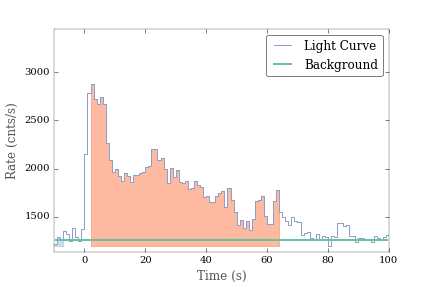

In [31]:
nai3.view_lightcurve(stop=100)

#### Model setup

We can use the model from the catalog and combine with the data into a JointLikelihood.

In [44]:

data_list = DataList(nai3,nai4,bgo0)

jl = JointLikelihood(models['GRB080916009'], data_list=data_list)

# Now we can fit

res = jl.fit()

Best fit values:



Best fit value             Unit
GRB080916009.spectrum.main.Band.K      0.0177 +/- 0.0006  1 / (cm2 keV s)
GRB080916009.spectrum.main.Band.alpha   -0.976 +/- 0.023                 
GRB080916009.spectrum.main.Band.beta      -2.12 +/- 0.10                 
GRB080916009.spectrum.main.Band.xp     (4.8 +/- 0.4)e+02              keV


NOTE: errors on parameters are approximate. Use get_errors().


Correlation matrix:



1.00  0.91 -0.95  0.38
 0.91  1.00 -0.86  0.31
-0.95 -0.86  1.00 -0.52
 0.38  0.31 -0.52  1.00


Values of -log(likelihood) at the minimum:



-log(likelihood)
total       3195.120128
n3          1043.011756
n4          1034.740043
b0          1117.368329

<IPython.core.display.Javascript object>


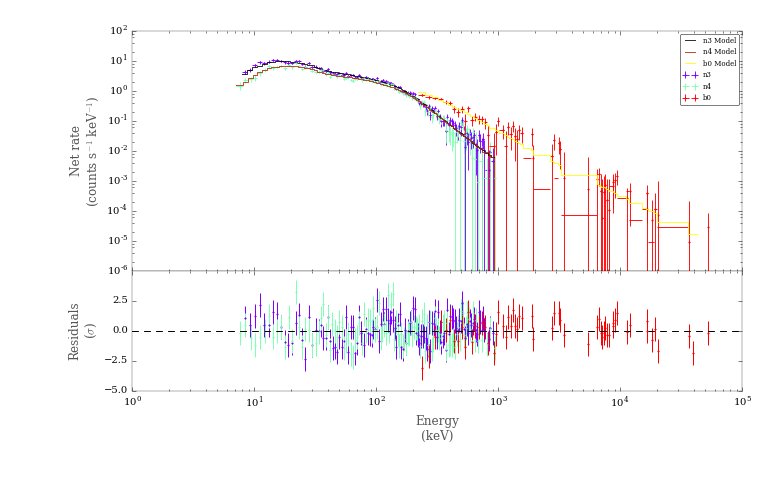

In [42]:
_ = display_ogip_model_counts(jl)

## LLE Catalog

### Searching
Similar to the GBM catalog, we can search LAT LLE triggers with the LLE catalog:


In [45]:
lle_catalog = FermiLLEBurstCatalog()

We can perform cone, time, and trigger searches just like as with the GBM catalog. Currently, no T90 searches are available.

In [46]:
lle_catalog.cone_search(0,0,300)

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermille&


<Table masked=True length=74>
      name         ra     dec    trigger_time trigger_type Search_Offset
                  deg     deg        mjd                                
     object     float64 float64    float64       object       float64   
--------------- ------- ------- ------------- ------------ -------------
   GRB131231198  10.110  -2.420 56657.1981028          GRB      623.5602
   GRB150510139  16.160   4.790 57152.1388164          GRB     1010.2079
SFLARE140225029 337.908  -9.260 56713.0287958       SFLARE     1431.8601
   GRB090227772  11.800  32.200 54889.7715441          GRB     2044.4631
   GRB090510016 333.600 -26.600 54961.0159719          GRB     2207.0064
   GRB141028455 322.601  -0.231 56958.4547081          GRB     2243.9766
   GRB081024891 322.900  21.200 54763.8907507          GRB     2517.6273
   GRB140110263  28.900 -36.260 56667.2629391          GRB     2705.7490
   GRB140206275 315.260  -8.520 56694.2751486          GRB     2722.4722
            ...     ...     ...           ...          ...           ...
   GRB140102887 211.919   1.333 56659.8872432          GRB     8883.3665
SFLARE121023135 207.861 -11.453 56223.1352032       SFLARE     9003.1300
   GRB130427324 173.136  27.713 56409.3243799          GRB     9090.9126
   GRB090217206 204.900  -8.400 54879.2060481          GRB     9228.4297
   GRB131108862 156.501   9.662 56604.8624509          GRB     9281.7830
   GRB141207800 159.990   3.910 56998.7995498          GRB     9577.6167
   GRB090323002 190.700  17.100 54913.0018823          GRB     9594.8025
SFLARE110906929 165.089   6.365 55810.9286792       SFLARE     9828.9373
   GRB120624933 170.940   8.930 56102.9332747          GRB    10038.3032
SFLARE110924399 180.771  -0.334 55828.3990585       SFLARE    10749.5813

In [47]:
lle_catalog.search_trigger_name('bn080916009')

Trying http://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermille&


<Table masked=True length=1>
    name        ra     dec    trigger_time trigger_type Search_Offset
               deg     deg        mjd                                
   object    float64 float64    float64       object       float64   
------------ ------- ------- ------------- ------------ -------------
GRB080916009 119.800 -56.600 54725.0088613          GRB     6352.6252

In [48]:
lle_catalog.search_utc(utc_start='2010-01-01T00:00:00', utc_stop= '2011-01-01T00:00:00')

<Table masked=True length=6>
      name         ra     dec    trigger_time trigger_type Search_Offset
                  deg     deg        mjd                                
     object     float64 float64    float64       object       float64   
--------------- ------- ------- ------------- ------------ -------------
   GRB100116897 305.020  14.450 55212.8965306          GRB     3374.4277
   GRB100225115 310.300 -59.400 55252.1149438          GRB     4246.6307
SFLARE100612038  84.390  18.790 55359.0382598       SFLARE     5081.3919
   GRB100724029 119.599  75.856 55401.0292360          GRB     5815.9321
   GRB100826957 284.000 -23.190 55434.9572095          GRB     4629.0839
   GRB101123952 135.160   1.910 55523.9524881          GRB     8107.6799

## Downloading LLE data

With the soon to be released 3ML LLE plugin, we no longer need PHA files. Therefore, the 3ML LLE downloader will get the LLE event file and associated LLE RSP (if it exists).

In [49]:
file_info = download_LLE_trigger_data('bn080916009')


WARNING FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.



In [50]:
file_info

{'lle': '/Users/jburgess/Research/coding/3ML/examples/gll_lle_bn080916009_v10.fit',
 'rsp': '/Users/jburgess/Research/coding/3ML/examples/gll_cspec_bn080916009_v10.rsp'}

## COMING SOON

Analyze the LLE data you have just downloaded

In [56]:
gbm_catalog._last_query_results['ra']

name
GRB100204024     50.78
GRB080916009    119.80
Name: ra, dtype: float64